# Artificial Neural Network (ANN) - Regression

Rafiq Islam  
2025-03-25

## Simple Linear Regression Using ANN

The simple linear regression equation is given as

$$
y_i = \beta_0+\beta_1 x_i + \xi_i = \sigma (w_0+\mathbf{x}^T\mathbf{w})=\sigma (\mathbf{x}^T\mathbf{w})
$$

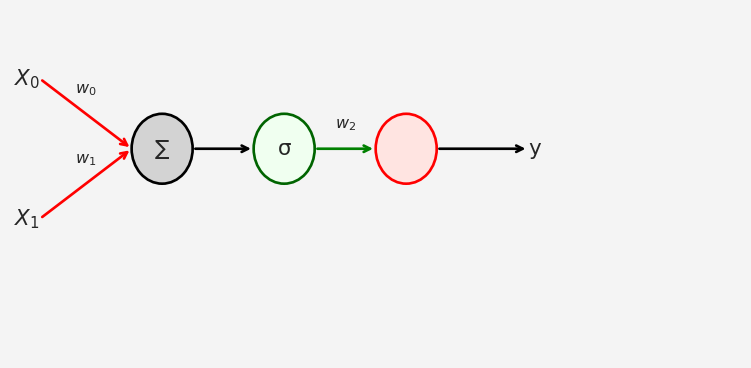

The loss function in this case MSE: Mean Squared Error

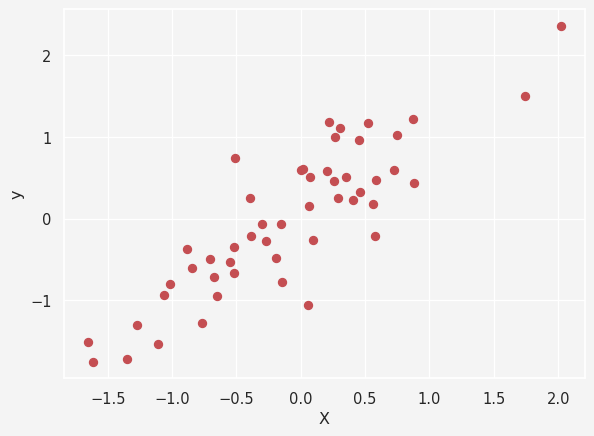

In [2]:
import torch 
n = 50 
# Creating n=50 random X values from the standard normal distribution
X = torch.randn(n,1) 
# y = mX + c + noise. Here m=1, c = 0, noise = N(0,1)/2
y = X + torch.randn(n,1)/2 

plt.plot(X,y, 'ro')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Now the model

In [3]:
import numpy as np
import torch.nn as nn 

ANN_regressor = nn.Sequential(
    nn.Linear(1,1), # Input Layer 
    nn.ReLU(),      # Rectified Linear Unit (ReLU) activation function
    nn.Linear(1,1)  # Output Layer
) 
ANN_regressor

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

Next we want to train our model using *Stochastic Gradient Descent*
optimizer

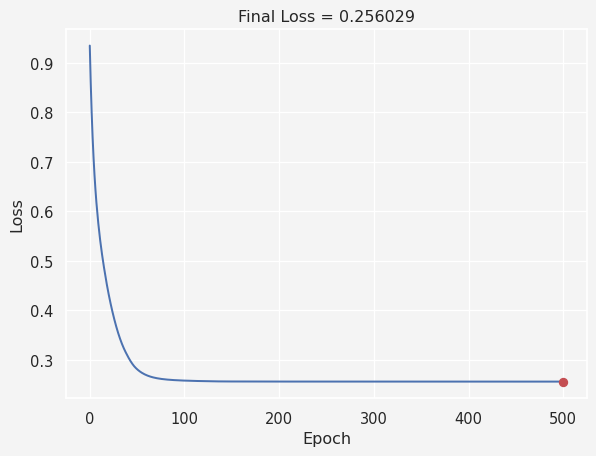

In [4]:
lr = 0.05                              # Learning rate/stepsize
loss_function = nn.MSELoss()           # MSE loss function  
optimizer = torch.optim.SGD(           # SGD Optimizer
    ANN_regressor.parameters(), 
    lr=lr
)

training_epochs = 500                  # Epochs
losses = torch.zeros(training_epochs)  # Creating 1D zero vector of size 500

# Train the model 

for epoch in range(training_epochs):

    # forward pass 
    pred = ANN_regressor(X)

    # compute the loss
    loss = loss_function(pred, y)
    losses[epoch] = loss

    # back propagation 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predictions = ANN_regressor(X)
test_loss = (predictions - y).pow(2).mean()

plt.plot(losses.detach())
plt.plot(training_epochs, test_loss.detach(), 'ro')
plt.title('Final Loss = %g' %test_loss.item())
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Now let’s calculate the predictions

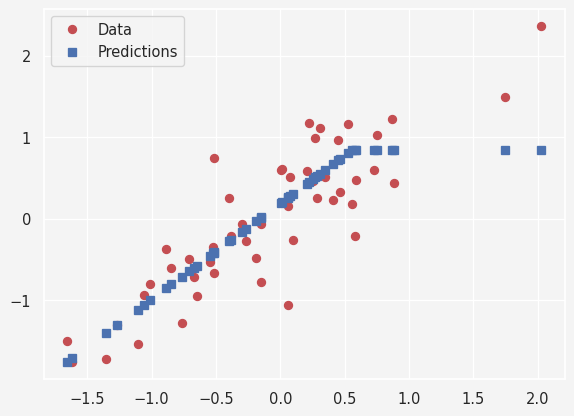

In [5]:
plt.plot(X,y, 'ro', label = 'Data')
plt.plot(X,predictions.detach(), 'bs', label='Predictions')
plt.legend()
plt.show()

Putting all together

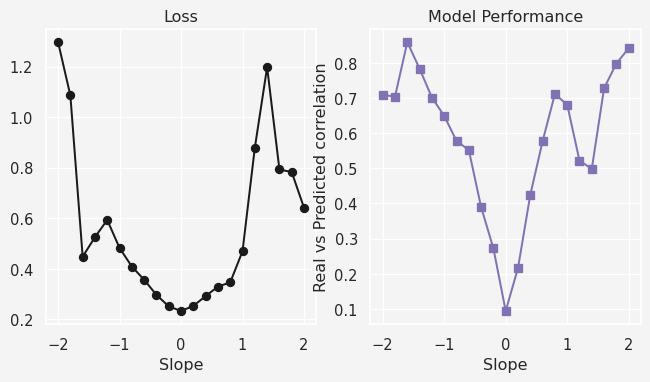

In [6]:
def ann_reg(X,y):
    model = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    loss_function = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
    training_epochs = 500

    losses = torch.zeros(training_epochs)

    for epoch in range(training_epochs):
        pred = model(X)

        loss = loss_function(pred, y)
        losses[epoch] = loss 

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return model(X), losses

def data(m):
    X = torch.randn(50,1)
    y = m*X + torch.randn(50,1)/2

    return X, y 

slopes = np.linspace(-2,2,21)

train = 30

results = np.zeros((len(slopes), train,2))

for m in range(len(slopes)):
    for t in range(train):
        X,y = data(slopes[m])
        prediction,loss = ann_reg(X,y)
        results[m, t, 0] = loss[-1]
        results[m, t, 1] = np.corrcoef(y.T,prediction.detach().T)[0,1]

results[np.isnan(results)]=0

fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].plot(slopes, np.mean(results[:,:,0], axis=1),'ko-')
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes, np.mean(results[:,:,1],axis=1),'ms-')
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real vs Predicted correlation')
ax[1].set_title('Model Performance')
plt.show()

------------------------------------------------------------------------

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/ann-linreg/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/ann-linreg/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/ann-linreg/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**